# Investigate sizes and resolutions

In this notebook I am investigating smaller and larger resolutions with smaller and larger window sizes

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [11]:
import os
import sys
import warnings

# Ignore warnings as they just pollute the output
warnings.filterwarnings('ignore')

# Enable importing modules from the parent directory
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
module_path = os.path.abspath(os.path.join('../experiments'))
if module_path not in sys.path:
    sys.path.append(module_path)

# DNase-seq 2011, hg19
bw = 'data/ENCFF158GBQ.bigWig'
chroms = ['chr22', 'chr1']

## Load and normalize the data

#### Download the data

In [6]:
from download import download_encode_file
from pathlib import Path

Path('data').mkdir(parents=True, exist_ok=True) 

download_encode_file('ENCFF158GBQ.bigWig')

File already exist. To overwrite pass `overwrite=True`


#### Load models, extract genomic windows, and normalize data

In [29]:
# Load model and data and normalize data

from server import bigwig

data_smaller = bigwig.chunk(
    bw,
    3000,
    25,
    3000 / 3,
    ['chr10'],
    verbose=True,
)

Extracted 135533 windows from chr10 with a max value of 1.0.


## Visualize small regions

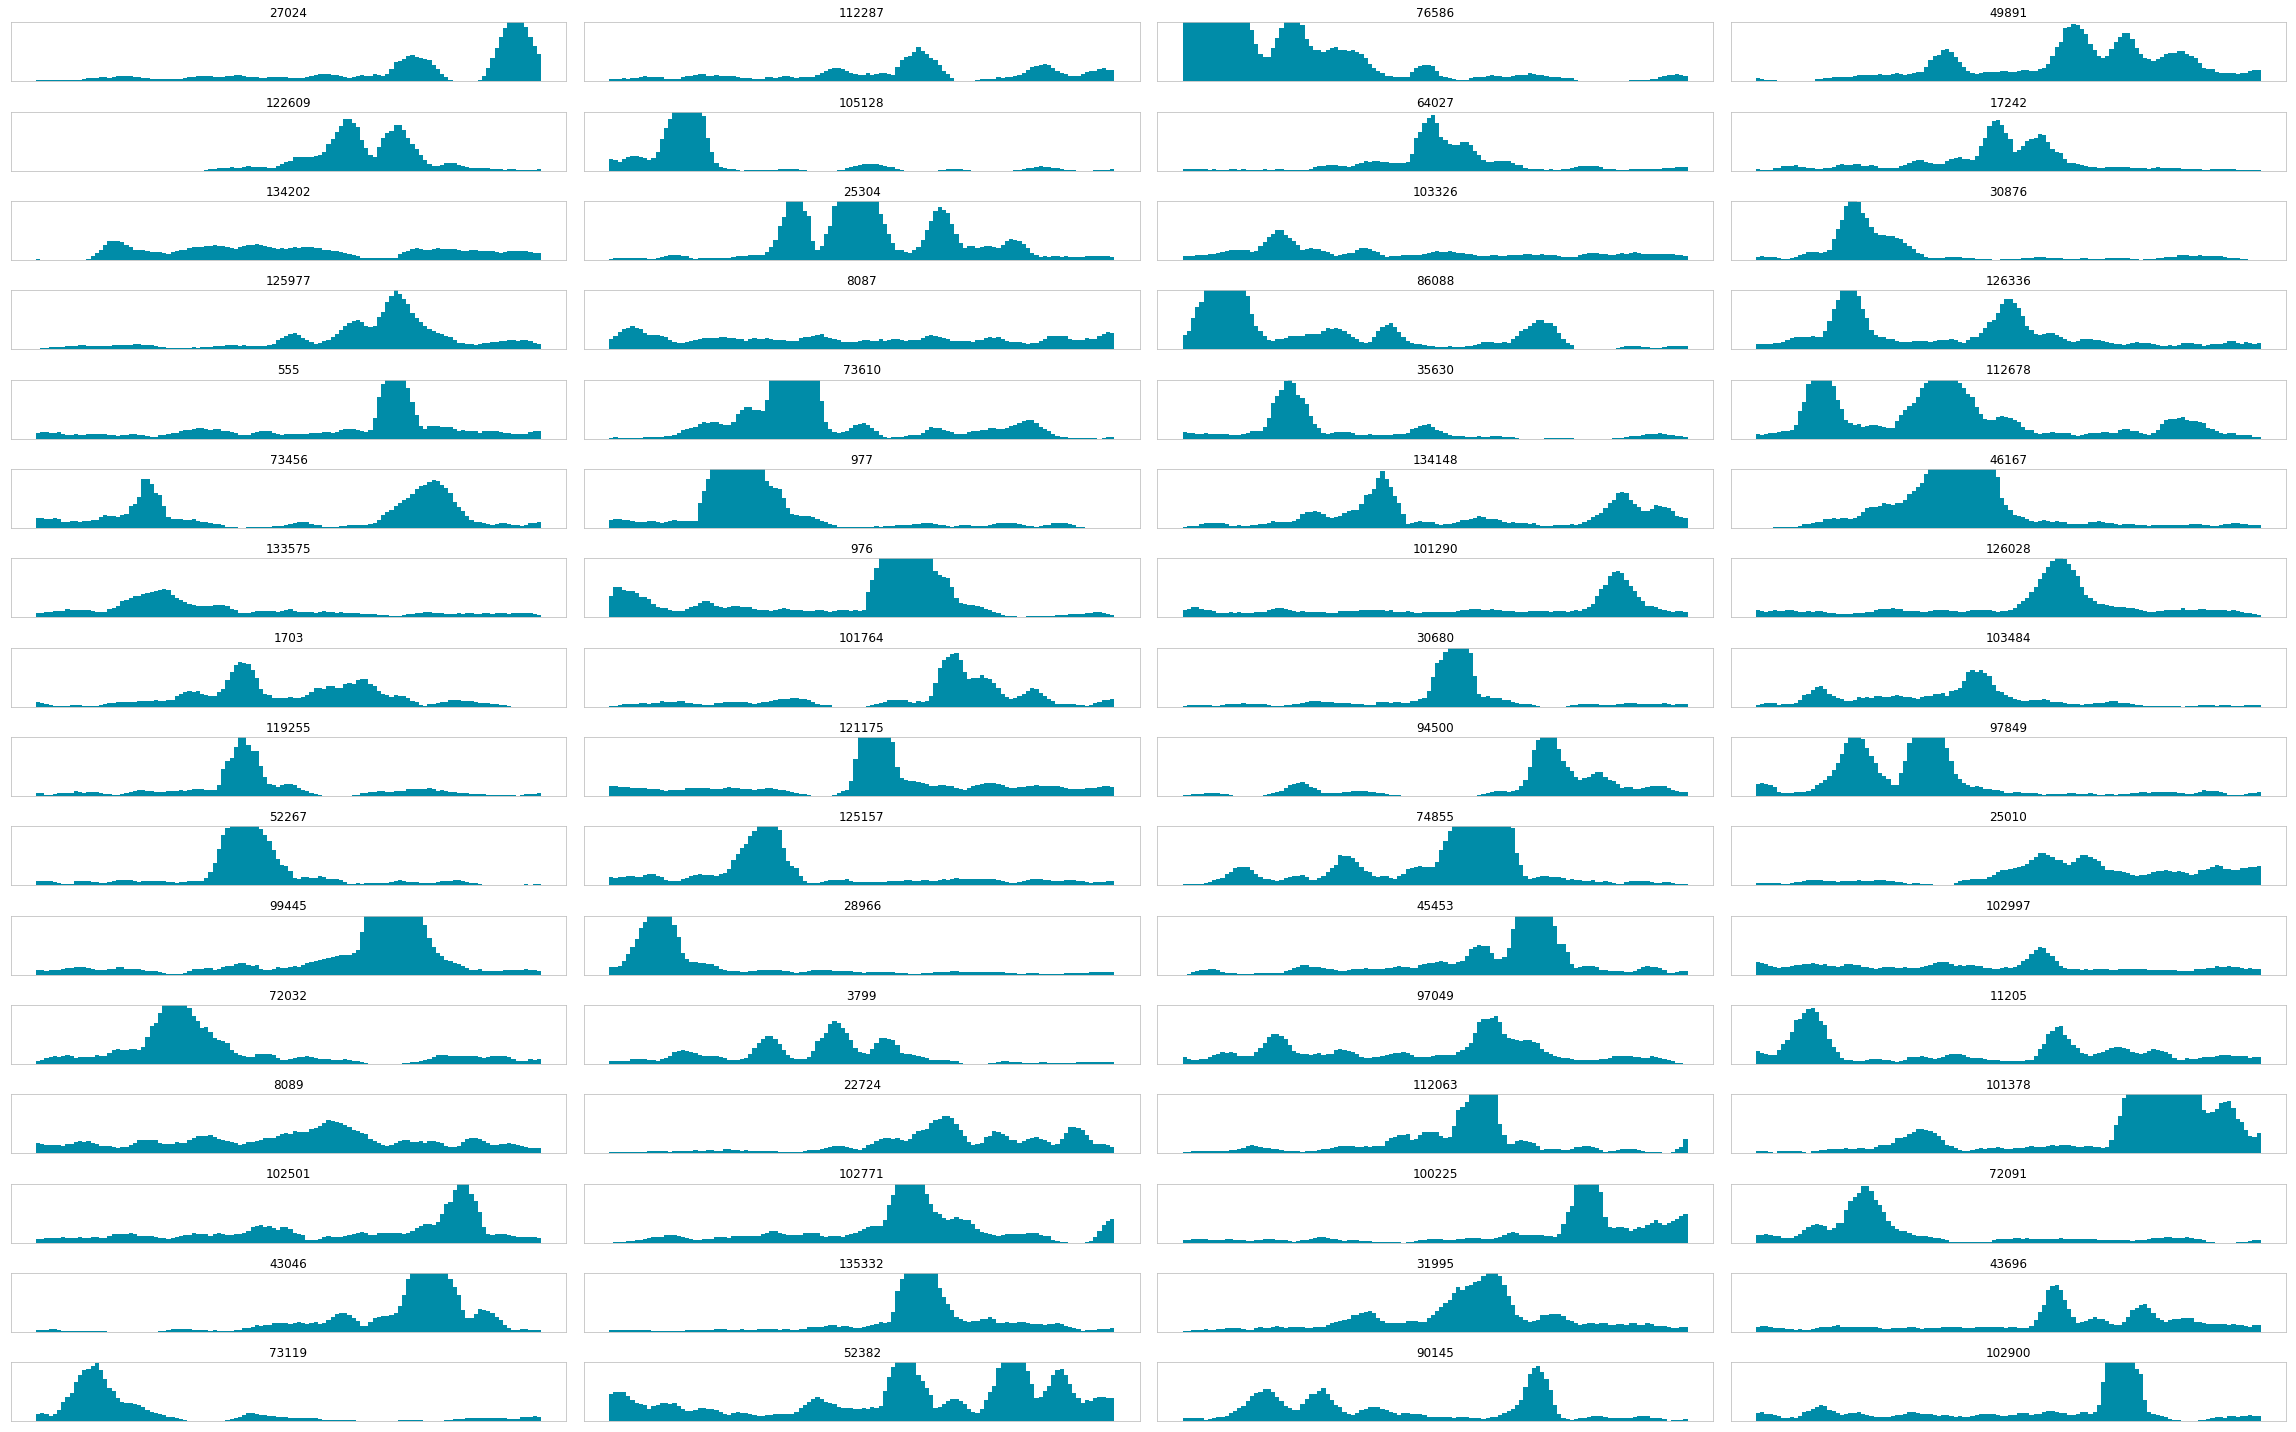

In [37]:
from ae.utils import plot_windows_from_data

num_windows = 64
min_signal = 15

plot_windows_from_data(
    data_smaller,
    num=num_windows,
    min_signal=min_signal,
)

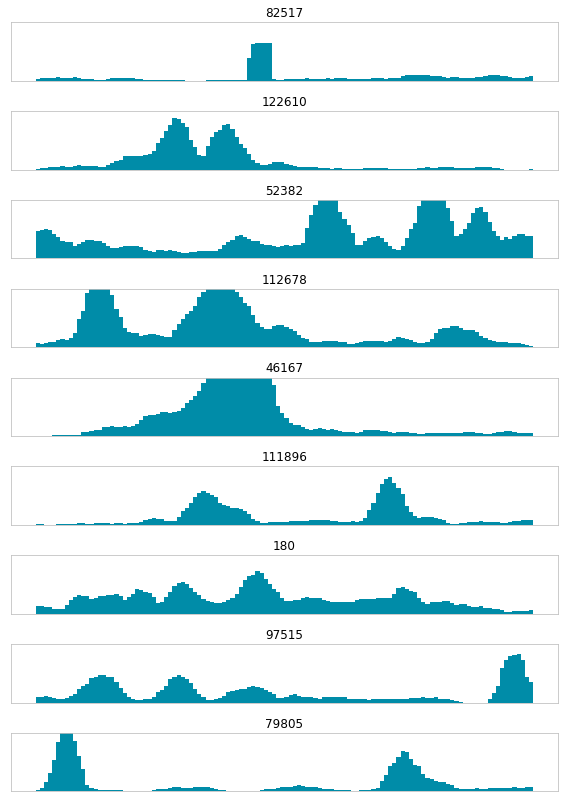

In [41]:
interesting_small_regions = [82517, 122610, 52382, 112678, 46167, 111896, 180, 97515, 79805]

plot_windows_from_data(data_smaller, window_ids=interesting_small_regions)

In [19]:
# Load model and data and normalize data

from server import bigwig

data_larger = bigwig.chunk(
    bw,
    120000,
    1000,
    120000 / 12,
    ['chr1', 'chr2', 'chr3', 'chr4', 'chr5'],
    verbose=True,
)

Extracted 24915 windows from chr1 with a max value of 1.0.
Extracted 24309 windows from chr2 with a max value of 0.9999999999999999.
Extracted 19792 windows from chr3 with a max value of 1.0.
Extracted 19105 windows from chr4 with a max value of 1.0.
Extracted 18081 windows from chr5 with a max value of 1.0.


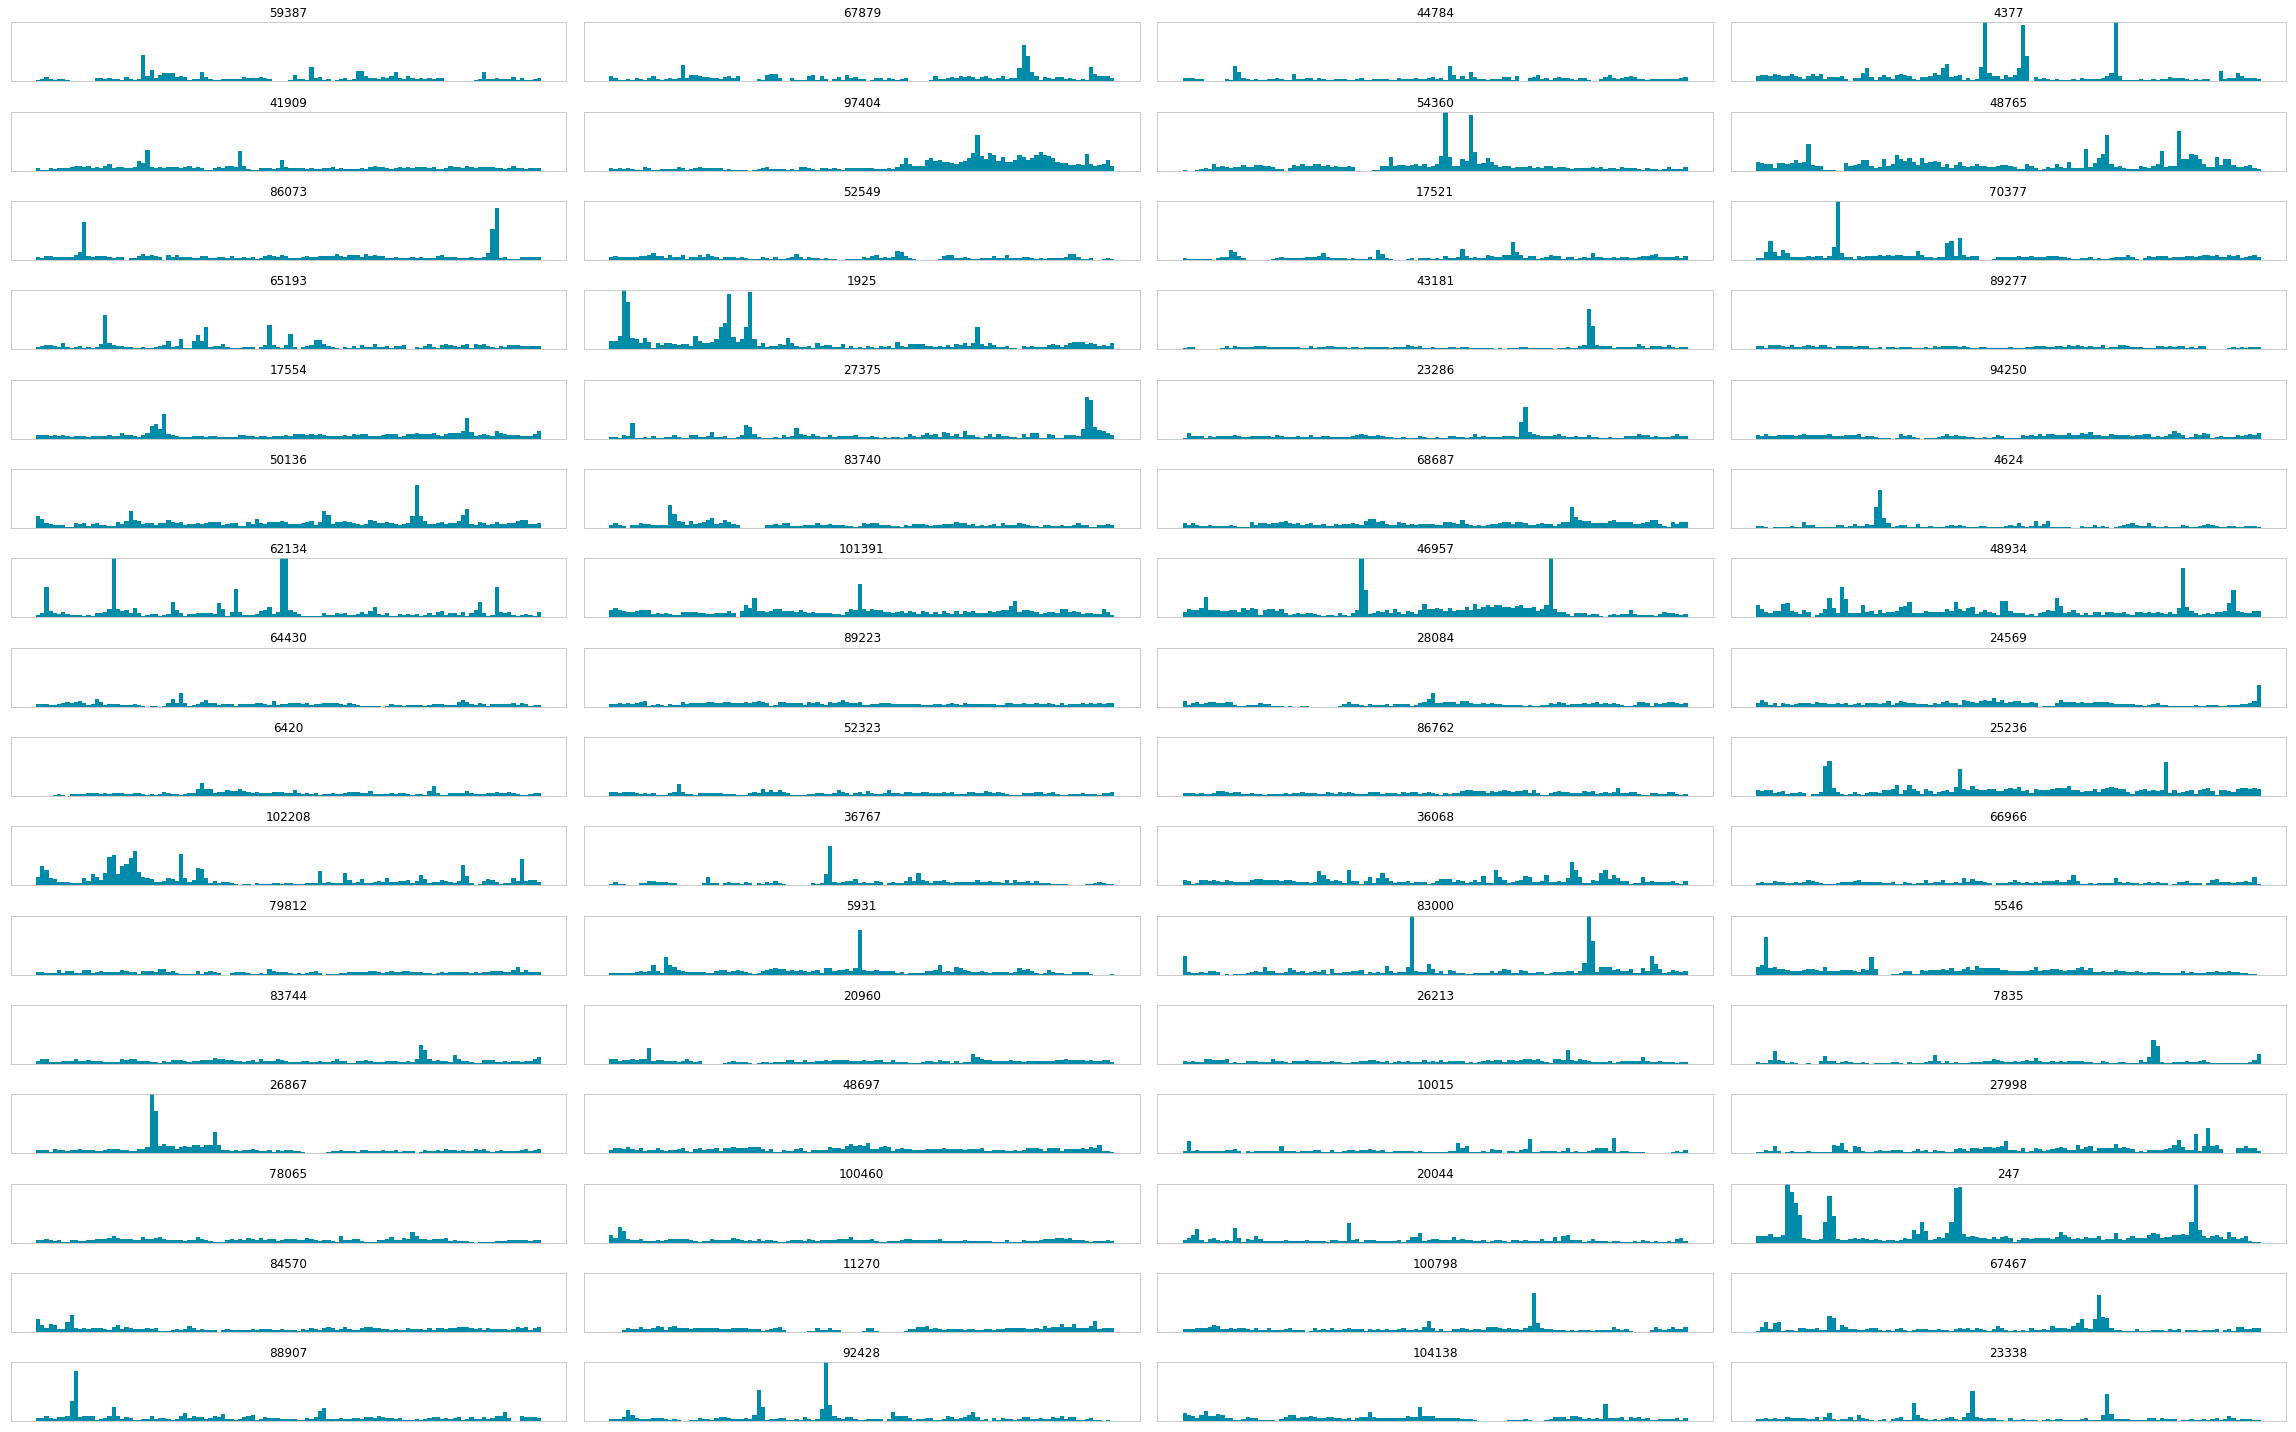

In [26]:
from ae.utils import plot_windows_from_data

num_windows = 64
min_signal = 5

plot_windows_from_data(
    data_larger,
    num=num_windows,
    min_signal=min_signal,
)

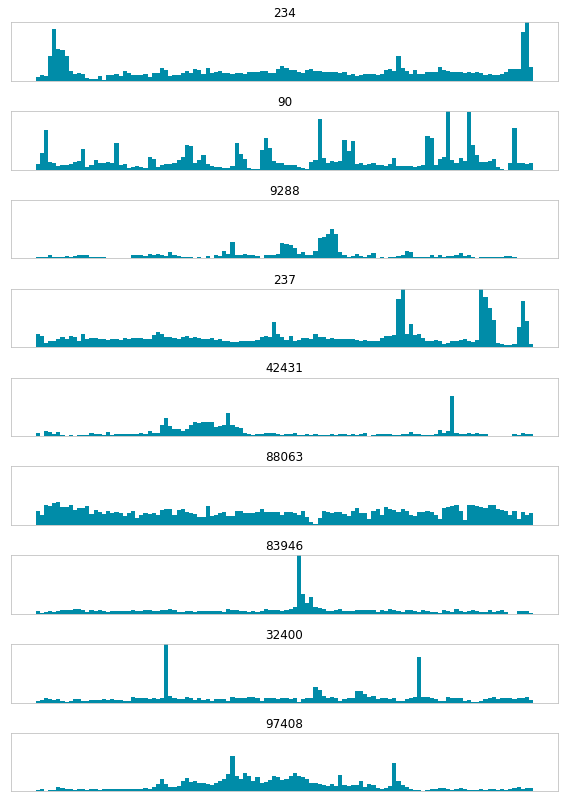

In [28]:
interesting_large_regions = [234, 90, 9288, 237, 42431, 88063, 83946, 32400, 97408]

plot_windows_from_data(data_larger, window_ids=interesting_large_regions)